<p>Use the daily bike data set
day.csv . ( archive.ics.uci.edu /ml/machine
learning databases/00275/)</p>

* Build a linear regression model using your inputs (normalized temperature
atemp ), humidity and windspeed) and output is the cnt
* Compare your results with that of the closed form.
* Plot your cost function with the number of iterations.

Hint: Normalize your data to speed your convergence

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/bike_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# sns.pairplot(data)
# plt.show()

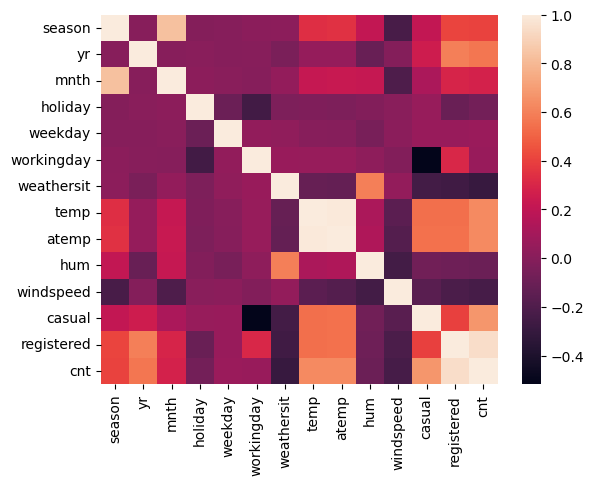

In [9]:
sns.heatmap(data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr())
plt.show()

As given in the question we are using 
*  (normalized temperature atemp )
* humidity 
* windspeed

<p> as the inputs </p>

In [10]:
X = data[['atemp', 'hum', 'windspeed']]
y = data['cnt']

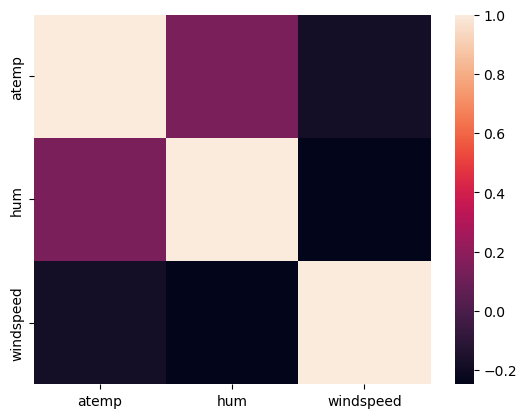

In [11]:
sns.heatmap(X.corr())
plt.show()

We can say inputs as unique and not correlated to cause overlaps 

In [12]:
X.head()

,atemp,hum,windspeed
0,0.363625,0.805833,0.160446
1,0.353739,0.696087,0.248539
2,0.189405,0.437273,0.248309
3,0.212122,0.590435,0.160296
4,0.229270,0.436957,0.186900


In [13]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### Data preprocessing

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the data into train and test (20% and 80% respectively)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train.columns

Index(['atemp', 'hum', 'windspeed'], dtype='object')

In [22]:
# Making data Standard
scalar = Normalizer()
features_normalise = ['atemp', 'hum', 'windspeed']
X_train[features_normalise] = scalar.fit_transform(X_train[features_normalise])

### Using Predefined Function from Sklearn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
X_test[features_normalise] = scalar.fit_transform(X_test[features_normalise])

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
model.score(X_test,y_test)

0.5137319757556367

### Closed form  Linear Regression

In [27]:
X_matrix = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_train = X_matrix
X_matrix

array([[1.        , 0.35068544, 0.90378946, 0.24532494],
       [1.        , 0.71367977, 0.67769541, 0.17717257],
       [1.        , 0.63871531, 0.75946898, 0.12348934],
       ...,
       [1.        , 0.6402181 , 0.74854469, 0.17263148],
       [1.        , 0.80485252, 0.58542386, 0.09742343],
       [1.        , 0.45277679, 0.8656929 , 0.21346894]])

In [28]:
theta = np.transpose(np.matrix(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))))
theta

matrix([[9134.36185593],
        [ -13.91154047],
        [ 479.44751916]])

In [29]:
X_train.shape

(584, 4)

### Gradient decent Linear Regression (L2 Regularisation)

In [30]:
# X = np.matrix([[1,i] for i in range(1,8)])
# y = np.transpose(np.matrix([80,170,100,220,200,270,500]))
# features = X.shape[1]
# theta = np.transpose(np.matrix([0 for _ in range(0,features)]))

In [31]:
# data_size = X.shape[0]
# Lambda = 1
# m = data_size
# alpha=10 ** -3
# # X = X_matrix
# # y = np.transpose(np.matrix(y))

# weight_reg = np.identity(data_size)
# weight_reg[0][0] = weight_reg[0][0] - 1

# y_pred = X * theta 
# y_pred

In [32]:
# theta = theta - alpha/m * (np.dot(np.transpose(X),(y_pred-y)))
# theta

In [33]:
# y_pred = X * theta 
# y_pred

In [34]:
# J_min = []
# for i in range(10000):
#     theta = theta - alpha/m * (np.dot(np.transpose(X),(y_pred-y)))
#     y_pred = X * theta 
#     J_min.append(np.power((y_pred - y),2).sum())

In [35]:
# J_min

In [36]:
# theta

In [37]:
def get_prediction(X,theta):
    return X * theta 

In [38]:
def get_theta(X,y,y_pred,theta,alpha,m):
    return (theta - alpha/m * (np.dot(np.transpose(X),(y_pred-y))))

In [39]:
def get_cost(y,y_pred):
    return np.power((y_pred - y),2).sum()

In [40]:
def linear_regression(X,y,theta_initial,alpha,m,max_iterations,allowed_error=0):
    J_min = []
    theta = theta_initial
    for i in range(max_iterations):
        y_pred = get_prediction(X,theta)
        theta = get_theta(X,y,y_pred,theta,alpha,m)
        error_value = get_cost(y,y_pred)
        if i == 0:
            J_min.append(error_value)
            continue
        if (J_min[-1]) - error_value < allowed_error:
            print(J_min[-1] - error_value)
            print('stopping here')
            break
        J_min.append(np.round(error_value,3))
    return theta,J_min

In [41]:
X_train

array([[1.        , 0.35068544, 0.90378946, 0.24532494],
       [1.        , 0.71367977, 0.67769541, 0.17717257],
       [1.        , 0.63871531, 0.75946898, 0.12348934],
       ...,
       [1.        , 0.6402181 , 0.74854469, 0.17263148],
       [1.        , 0.80485252, 0.58542386, 0.09742343],
       [1.        , 0.45277679, 0.8656929 , 0.21346894]])

In [61]:
y_train = np.transpose(np.matrix(y_train))
y_train[:5]

matrix([[1471],
        [7639],
        [7328],
        [6118],
        [3669]], dtype=int64)

In [54]:
features = X_train.shape[1]
theta = np.transpose(np.matrix([0 for _ in range(features)]))
theta

matrix([[0],
        [0],
        [0],
        [0]])

In [55]:
theta,cost = linear_regression(X=X_train,y=y_train,theta_initial = theta,alpha=0.001,m=features,max_iterations=10000)
theta

matrix([[ -830.58286759],
        [ 9150.7786612 ],
        [  893.09434985],
        [-2089.23568815]])

In [65]:
# cost[-1]

8120547943.272

In [57]:
get_prediction(X=X_train,theta=theta)[:5]

matrix([[2673.08965126],
        [5935.23339288],
        [5434.43868425],
        [5509.97855715],
        [3775.77297536]])

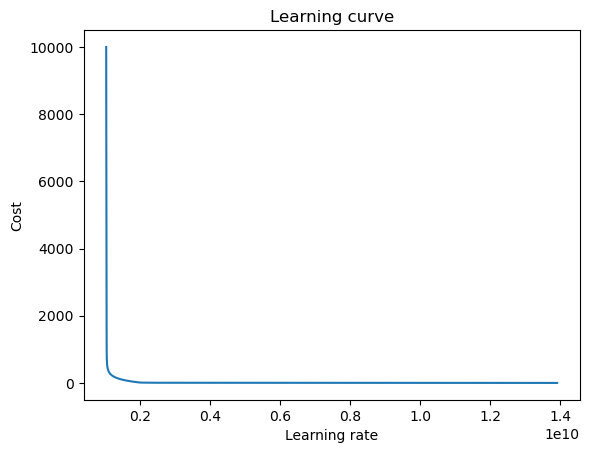

In [59]:
plt.plot(cost,[i for i in range(len(cost))])
plt.title('Learning curve')
plt.xlabel("Learning rate")
plt.ylabel("Cost")
plt.show()

In [67]:
# From the above data we can conclude that the ideal learning rate for the made model is around 0.18 with parameters having values

In [68]:
theta

matrix([[ -830.58286759],
        [ 9150.7786612 ],
        [  893.09434985],
        [-2089.23568815]])